In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

['test.csv', 'merchants.csv', 'train.csv', 'Data_Dictionary.xlsx', 'new_merchant_transactions.csv', 'sample_submission.csv', 'historical_transactions.csv']


In [2]:
train_df = pd.read_csv('../input/train.csv', header = 0)
#train_df = train_df[train_df.target > -30]
history_df = pd.read_csv('../input/historical_transactions.csv', header = 0)

print('Train frame shape: ', train_df.shape)
print('History frame shape: ', history_df.shape)

Train frame shape:  (201917, 6)
History frame shape:  (29112361, 14)


In [3]:
new_df = pd.read_csv('../input/new_merchant_transactions.csv', header = 0)

In [4]:
new_df.authorized_flag.value_counts() # have no any NO AUTH transacts in new data

Y    1963031
Name: authorized_flag, dtype: int64

In [5]:
new_df.shape

(1963031, 14)

In [6]:
history_df = history_df[history_df.authorized_flag == 'Y']

In [7]:
#train_df = train_df[train_df.target > -30]

In [8]:
new_df['sq_purchase_amount'] = new_df['purchase_amount'].apply(lambda x: x * x)

In [9]:
history_df['purchase_amount'].describe()

count    2.659545e+07
mean    -5.887894e-01
std      5.980155e-01
min     -7.468928e-01
25%     -7.202508e-01
50%     -6.892060e-01
75%     -6.079426e-01
max      4.301697e+02
Name: purchase_amount, dtype: float64

In [10]:
history_df.head(1)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37


**Maybe unauthorized transactions not interesting for analyzing**

# Purchase_amount aggregation

In [11]:
gb_purchase_amount = new_df.groupby('card_id')['purchase_amount'].agg([np.mean, np.std, np.median, np.min, np.max, np.sum])
gb_sq_purchase_amount = new_df.groupby('card_id')['sq_purchase_amount'].agg([np.mean, np.std, np.median, np.min, np.max, np.sum])

In [12]:
gb_sq_purchase_amount

,mean,std,median,amin,amax,sum
card_id,,,,,,
C_ID_00007093c1,0.441300,0.014116,0.441300,0.431319,0.451282,0.882601
C_ID_0001238066,0.355142,0.158341,0.421563,0.006134,0.548929,9.233695
C_ID_0001506ef0,0.523777,0.017040,0.523777,0.511729,0.535826,1.047555
C_ID_0001793786,0.868344,2.118805,0.304222,0.000010,9.796476,26.918665
C_ID_000183fdda,0.389398,0.160196,0.443243,0.011595,0.536310,4.283380
C_ID_0002709b5a,0.455075,0.077079,0.463477,0.374139,0.527608,1.365224
C_ID_000298032a,0.412000,NaN,0.412000,0.412000,0.412000,0.412000
C_ID_0002ba3c2e,0.476851,0.027251,0.486591,0.446068,0.497892,1.430552
C_ID_0002c7c2c1,0.434691,0.101582,0.450677,0.247773,0.535650,2.608144


In [13]:
gb_purchase_amount.shape

(290001, 6)

In [14]:
gb_purchase_amount.index.nunique()

290001

In [15]:
gb_purchase_amount.to_csv('gb_purchase_amount_new_df.csv', header = True, index = True)
gb_sq_purchase_amount.to_csv('gb_sq_purchase_amount_new_df.csv', header = True, index = True)

In [16]:
gb_purchase_amount
gb_sq_purchase_amount

,mean,std,median,amin,amax,sum
card_id,,,,,,
C_ID_00007093c1,0.441300,0.014116,0.441300,0.431319,0.451282,0.882601
C_ID_0001238066,0.355142,0.158341,0.421563,0.006134,0.548929,9.233695
C_ID_0001506ef0,0.523777,0.017040,0.523777,0.511729,0.535826,1.047555
C_ID_0001793786,0.868344,2.118805,0.304222,0.000010,9.796476,26.918665
C_ID_000183fdda,0.389398,0.160196,0.443243,0.011595,0.536310,4.283380
C_ID_0002709b5a,0.455075,0.077079,0.463477,0.374139,0.527608,1.365224
C_ID_000298032a,0.412000,NaN,0.412000,0.412000,0.412000,0.412000
C_ID_0002ba3c2e,0.476851,0.027251,0.486591,0.446068,0.497892,1.430552
C_ID_0002c7c2c1,0.434691,0.101582,0.450677,0.247773,0.535650,2.608144


# Counting num of transactions by card

In [17]:
import math
gb_transact_amount = new_df.groupby('card_id').size().sort_values(ascending = False)
gb_sqrt_transact_amount = gb_transact_amount.map(lambda x: math.sqrt(x))
gb_log2_transact_amount = gb_transact_amount.map(lambda x: math.log(x, 2))

In [18]:
gb_purchase_amount.to_csv('gb_transact_amount_new_df.csv', header = True, index = True)
gb_sqrt_transact_amount.to_csv('gb_sqrt_transact_new_history_df.csv', header = True, index = True)
gb_log2_transact_amount.to_csv('gb_log2_transact_new_history_df.csv', header = True, index = True)

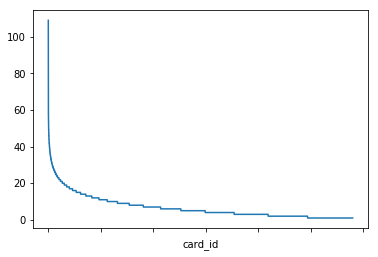

In [19]:
gb_transact_amount.plot()

In [20]:
gb_transact_amount.head()

card_id
C_ID_b7ebee6539    109
C_ID_c729288535    106
C_ID_8946508722    104
C_ID_0e4f6af077    104
C_ID_6cef1dba4b    100
dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


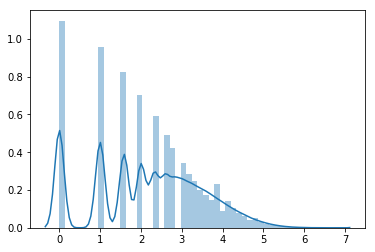

In [21]:
import seaborn as sns
import math
sns.distplot(gb_transact_amount.map(lambda x: math.log(x, 2)))

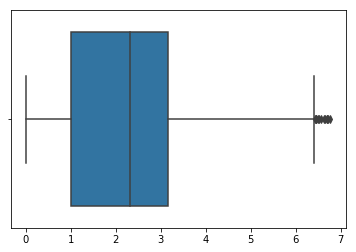

In [22]:
sns.boxplot(gb_transact_amount.map(lambda x: math.log(x, 2)))

# Categorical features creation 
**(grouping by and counting how many times for each)**

In [23]:
history_df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [24]:
history_df.authorized_flag.value_counts()

Y    26595452
Name: authorized_flag, dtype: int64

In [25]:
history_df.installments.value_counts()

 0      14302589
 1      10591787
 2        589125
 3        464071
-1        157794
 4        147193
 6        103419
 5         93938
 10        83419
 12        35995
 8         14177
 7          7560
 9          3831
 11          548
 999           6
Name: installments, dtype: int64

In [26]:
history_df.category_1.value_counts()

N    25035393
Y     1560059
Name: category_1, dtype: int64

In [27]:
history_df.category_2.value_counts()

1.0    14076929
3.0     3594380
5.0     3480975
4.0     2428594
2.0      930272
Name: category_2, dtype: int64

In [28]:
history_df.category_3.value_counts()

A    14302589
B    10591787
C     1543282
Name: category_3, dtype: int64

In [29]:
table_1 = pd.pivot_table(new_df, index=['card_id'], columns = ['category_1'], aggfunc='size')

In [30]:
table_2 = pd.pivot_table(new_df, index=['card_id'], columns = ['category_2'], aggfunc='size')

In [31]:
table_3 = pd.pivot_table(new_df, index=['card_id'], columns = ['category_3'], aggfunc='size')

In [32]:
table_installments = pd.pivot_table(new_df, index=['card_id'], columns = ['installments'], aggfunc='size')

In [33]:
#table_authorized_flag = pd.pivot_table(history_df, index=['card_id'], columns = ['authorized_flag'], aggfunc='size')

In [34]:
table_installments.head()

installments,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,999
card_id,,,,,,,,,,,,,,,
C_ID_00007093c1,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C_ID_0001238066,1.0,NaN,21.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
C_ID_0001506ef0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C_ID_0001793786,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C_ID_000183fdda,1.0,NaN,6.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
table_2

category_2,1.0,2.0,3.0,4.0,5.0
card_id,,,,,
C_ID_00007093c1,1.0,NaN,1.0,NaN,NaN
C_ID_0001238066,20.0,NaN,NaN,NaN,3.0
C_ID_0001506ef0,NaN,NaN,2.0,NaN,NaN
C_ID_0001793786,15.0,8.0,5.0,NaN,1.0
C_ID_000183fdda,NaN,NaN,11.0,NaN,NaN
C_ID_0002709b5a,1.0,1.0,NaN,NaN,1.0
C_ID_000298032a,1.0,NaN,NaN,NaN,NaN
C_ID_0002ba3c2e,NaN,3.0,NaN,NaN,NaN
C_ID_0002c7c2c1,6.0,NaN,NaN,NaN,NaN


In [36]:
# last point
table_1.to_csv('table_cat_1_new_df.csv', header = True, index = True)
table_2.to_csv('table_cat_2_new_df.csv', header = True, index = True)
table_3.to_csv('table_cat_3_new_df.csv', header = True, index = True)

table_installments.to_csv('table_installments_new_df.csv', header = True, index = True)
#table_authorized_flag.to_csv('table_authorized_flag_history_df.csv', header = True, index = True)

# Merchant, city and state ID (categories counts)

In [37]:
#let's back later
gb_merchant_history_df = new_df.groupby('card_id')['merchant_id'].nunique()
gb_city_history_df = new_df.groupby('card_id')['city_id'].nunique()
gb_state_history_df = new_df.groupby('card_id')['state_id'].nunique()

gb_merchant_history_df

card_id
C_ID_00007093c1     2
C_ID_0001238066    25
C_ID_0001506ef0     1
C_ID_0001793786    31
C_ID_000183fdda    11
C_ID_0002709b5a     3
C_ID_000298032a     1
C_ID_0002ba3c2e     3
C_ID_0002c7c2c1     6
C_ID_00032df08f     7
C_ID_0003754056     1
C_ID_000377f6a0     1
C_ID_0003be3c83     6
C_ID_0003f41435     2
C_ID_00042d509c     2
C_ID_0004587331     1
C_ID_0004725b87     2
C_ID_0004888ddd     2
C_ID_0004b68c49     2
C_ID_0004c2a5ab     2
C_ID_00057b99fe     1
C_ID_000599daf9     9
C_ID_0005f16cc8     3
C_ID_0006152db8     2
C_ID_000616f4a8     5
C_ID_000664aa02     8
C_ID_00079fec55     1
C_ID_0007a60a33     1
C_ID_0007fe3157     9
C_ID_000844d8f1    15
                   ..
C_ID_fffaed41f0    18
C_ID_fffb79fb56     1
C_ID_fffba72dc5     2
C_ID_fffbdf036b    21
C_ID_fffbee5c24     5
C_ID_fffc96bf24     3
C_ID_fffcb74f49     3
C_ID_fffcf66e12     1
C_ID_fffd070e0e     3
C_ID_fffd1207a8    10
C_ID_fffd24dcf3     9
C_ID_fffd337484     4
C_ID_fffd345048    17
C_ID_fffd351e7f    30
C_

In [38]:
gb_merchant_history_df.to_csv('gb_merchant_new_df.csv', header = True, index = True)
gb_city_history_df.to_csv('gb_city_new_df.csv', header = True, index = True)
gb_state_history_df.to_csv('gb_state_new_df.csv', header = True, index = True)

In [39]:
a = history_df.head(1000)
a

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37
5,Y,C_ID_4e6213e9bc,333,N,0,A,80,M_ID_50af771f8d,0,-0.734887,2018-02-24 08:45:05,1.0,9,37
6,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_5e8220e564,-11,-0.716855,2017-03-21 00:10:51,1.0,16,37
7,Y,C_ID_4e6213e9bc,3,N,0,A,80,M_ID_9d41786a50,-3,-0.657049,2017-11-18 20:05:55,1.0,16,37
8,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-8,-0.737967,2017-06-01 22:02:56,1.0,16,37
9,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_74ba14b5fc,-11,-0.715352,2017-03-16 15:41:22,1.0,16,37


In [40]:
#easy-understanding example
a.groupby('card_id')['city_id'].nunique()

card_id
C_ID_0e171c1b48     4
C_ID_48fb13e70f     2
C_ID_4e6213e9bc     6
C_ID_5037ff576e    31
C_ID_fc8e41b9cf     9
Name: city_id, dtype: int64